# Exercise 11-1: Create a multiple regression

## Import the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [4]:
# read the info.txt file and rename the Length columns so they're more descriptive
fish.rename(columns={"Length1": "VerticalLength", "Length2": "DiagonalLength", "Length3": "CrossLength"},
            inplace=True)
print(fish.head())


  Species  Weight  VerticalLength  DiagonalLength  CrossLength   Height  \
0   Bream   242.0            23.2            25.4         30.0  11.5200   
1   Bream   290.0            24.0            26.3         31.2  12.4800   
2   Bream   340.0            23.9            26.5         31.1  12.3778   
3   Bream   363.0            26.3            29.0         33.5  12.7300   
4   Bream   430.0            26.5            29.0         34.0  12.4440   

    Width  
0  4.0200  
1  4.3056  
2  4.6961  
3  4.4555  
4  5.1340  


## Identify a correlation

In [5]:
# get the correlation data for the Weight column

numeric_cols = list(fish.select_dtypes(include='number').columns)
weight_correlations = fish[numeric_cols].corr()[['Weight']]
print(weight_correlations)

                  Weight
Weight          1.000000
VerticalLength  0.915712
DiagonalLength  0.918618
CrossLength     0.923044
Height          0.724345
Width           0.886507


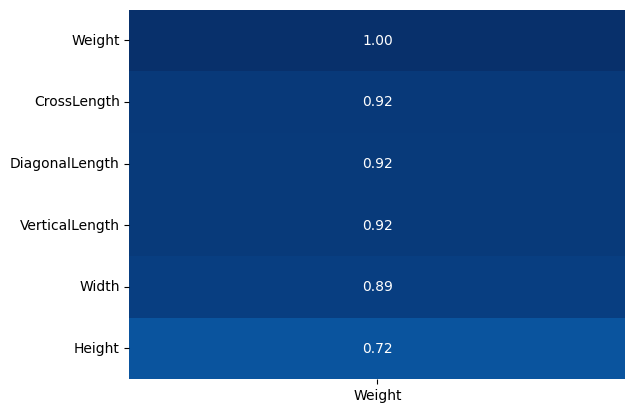

In [6]:
import matplotlib.pyplot as plt
# create a heatmap for the correlation data
sns.heatmap(data=weight_correlations.sort_values('Weight', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

plt.yticks(rotation=0)
plt.show()

## Create a multiple regression model

In [7]:
# Use the correlation data to choose three independent variables. The first two should be the Height and
# Width columns. The third should be one of the length columns

independent_vars = ['Height','Width','CrossLength']

# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream

bream = fish.loc[fish['Species'] == "Bream"]
print(bream.head())

  Species  Weight  VerticalLength  DiagonalLength  CrossLength   Height  \
0   Bream   242.0            23.2            25.4         30.0  11.5200   
1   Bream   290.0            24.0            26.3         31.2  12.4800   
2   Bream   340.0            23.9            26.5         31.1  12.3778   
3   Bream   363.0            26.3            29.0         33.5  12.7300   
4   Bream   430.0            26.5            29.0         34.0  12.4440   

    Width  
0  4.0200  
1  4.3056  
2  4.6961  
3  4.4555  
4  5.1340  


In [8]:
# split the training and test data
X_train, X_test, y_train, y_test = train_test_split(
    bream.drop(columns=['Weight']), bream[['Weight']], test_size=0.33, random_state=42)

In [9]:
# create the model and fit the training data
model = LinearRegression()
model.fit(X_train[independent_vars], y_train)

LinearRegression()

In [10]:
# score the testing data
model.score(X_test[independent_vars],y_test)

0.8726249232923436

In [11]:
# make the predictions
y_predicted = model.predict(X_test[independent_vars])

In [12]:
# join the predicted data with the original data

predicted = pd.DataFrame(y_predicted, columns=['predictedWeight'])
final = predicted.join([X_test[independent_vars].reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final[independent_vars+['Weight','predictedWeight']].head()

,Height,Width,CrossLength,Weight,predictedWeight
0,16.3618,6.0900,40.6,720.0,746.706846
1,13.9129,5.0728,37.3,340.0,520.145912
2,16.2405,5.5890,40.5,700.0,714.705377
3,15.9936,5.3704,39.2,685.0,669.999253
4,15.4380,5.5800,37.2,600.0,618.939717


## Plot the residuals

In [13]:
# calculate the residuals and store them in a column
final['residual'] = final.Weight - final.predictedWeight
final.head(10)

,predictedWeight,Height,Width,CrossLength,Weight,residual
0,746.706846,16.3618,6.0900,40.6,720.0,-26.706846
1,520.145912,13.9129,5.0728,37.3,340.0,-180.145912
2,714.705377,16.2405,5.5890,40.5,700.0,-14.705377
3,669.999253,15.9936,5.3704,39.2,685.0,15.000747
4,618.939717,15.4380,5.5800,37.2,600.0,-18.939717
5,934.281099,18.9570,6.6030,42.6,1000.0,65.718901
6,603.300405,14.4738,5.7276,38.7,650.0,46.699595
7,463.222532,13.7592,4.3680,36.4,500.0,36.777468
8,476.689519,14.0049,4.8438,35.1,450.0,-26.689519
9,594.384852,14.8604,5.2854,38.3,700.0,105.615148


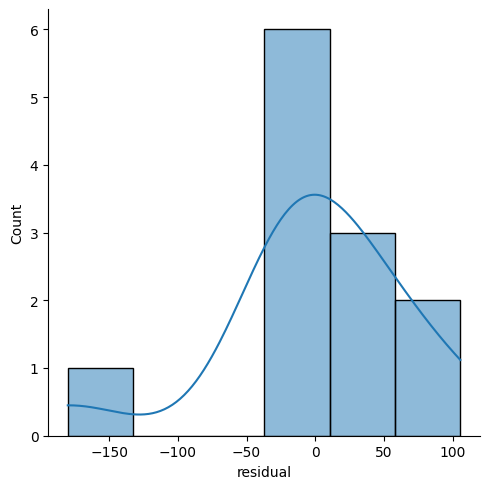

In [14]:
# create a KDE plot for the residuals
sns.displot(data=final, x='residual', kde=True)
plt.show()